#  Animal Image Classifier with Auto Split (MobileNetV2)

In [1]:
# 1. Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import warnings
warnings.filterwarnings("ignore")


In [2]:
# 2. Dataset Path
dataset_dir = "dataset"  # contains all 15 class folders directly

In [3]:
# 3. Parameters
img_size = (224, 224)
batch_size = 32
val_split = 0.2
num_classes = 15
epochs = 20

In [4]:
# 4. Data Generators
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=val_split,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True
)
train_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)
val_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 1561 images belonging to 15 classes.
Found 383 images belonging to 15 classes.


In [5]:
# 5. Model Definition
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
preds = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=preds)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
# 6. Callbacks
checkpoint_cb = ModelCheckpoint("mobilenetv2_best.h5", save_best_only=True, monitor="val_accuracy", mode="max")
earlystop_cb = EarlyStopping(patience=5, restore_best_weights=True)
callbacks=[checkpoint_cb, earlystop_cb]

In [7]:
# 7. Training
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epochs,
    callbacks=callbacks
)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 824ms/step - accuracy: 0.4880 - loss: 1.7772

49/49 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.4923 - loss: 1.7632 - val_accuracy: 0.8799 - val_loss: 0.4078
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 816ms/step - accuracy: 0.9273 - loss: 0.2592

49/49 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9273 - loss: 0.2592 - val_accuracy: 0.9008 - val_loss: 0.3055
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.9441 - loss: 0.1841 - val_accuracy: 0.8799 - val_loss: 0.3363
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.9563 - loss: 0.1348 - val_accuracy: 0.8825 - val_loss: 0.3522
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.9756 - loss: 0.1100 - val_accuracy: 0.8825 - val_loss: 0.3664
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.9629 - loss: 0.0973 - val_accuracy: 0.8956 - val_loss: 0.3776
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 822ms/step - accuracy: 0.9729 - loss: 0.0876

49/49 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9730 - loss: 0.0875 - val_accuracy: 0.9060 - val_loss: 0.2922
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.9834 - loss: 0.0632 - val_accuracy: 0.9034 - val_loss: 0.3336
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.9846 - loss: 0.0531 - val_accuracy: 0.8877 - val_loss: 0.3577
Epoch 10/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.9785 - loss: 0.0631 - val_accuracy: 0.9034 - val_loss: 0.2965
Epoch 11/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.9899 - loss: 0.0354 - val_accuracy: 0.8956 - val_loss: 0.3228
Epoch 12/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 815ms/step - accuracy: 0.9920 - loss: 0.0331

49/49 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.9920 - loss: 0.0331 - val_accuracy: 0.9138 - val_loss: 0.3003


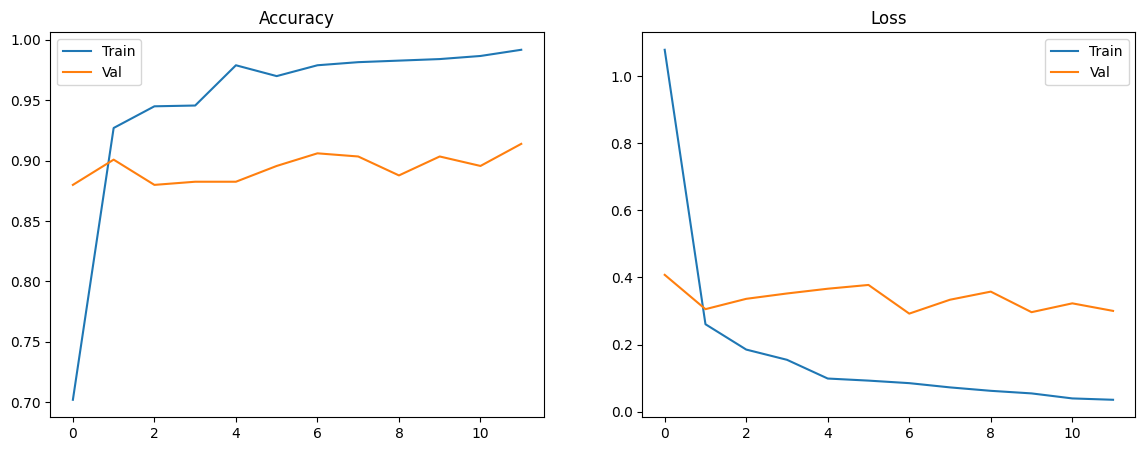

In [8]:
# 8. Plot Accuracy & Loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Loss')
plt.legend()
plt.show()

In [9]:
# 9. Confusion Matrix & Report
val_gen.reset()
Y_pred = model.predict(val_gen)
y_pred = np.argmax(Y_pred, axis=1)
y_true = val_gen.classes
class_labels = list(val_gen.class_indices.keys())

12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 939ms/step


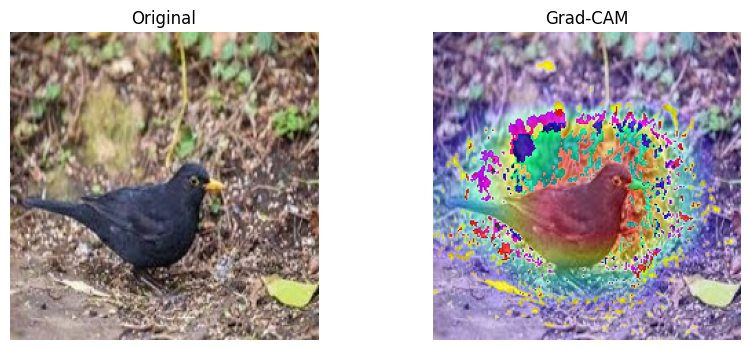

In [10]:
# 10. Grad-CAM Visualization
def get_img_array(img_path, size):
    # Load and preprocess image
    img = image.load_img(img_path, target_size=size)
    array = image.img_to_array(img)
    array = preprocess_input(array)
    return np.expand_dims(array, axis=0), img

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]
    
    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def display_gradcam(img_path, heatmap, alpha=0.4):
    # Load original image
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

    heatmap = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap_color * alpha + img
    superimposed_img = np.uint8(superimposed_img)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title("Original")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Grad-CAM")
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Run Grad-CAM on any image
test_img_path = "dataset/Bird/Bird_29.jpeg"  # replace with real path
img_array, original_img = get_img_array(test_img_path, img_size)
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name="Conv_1")
display_gradcam(test_img_path, heatmap)



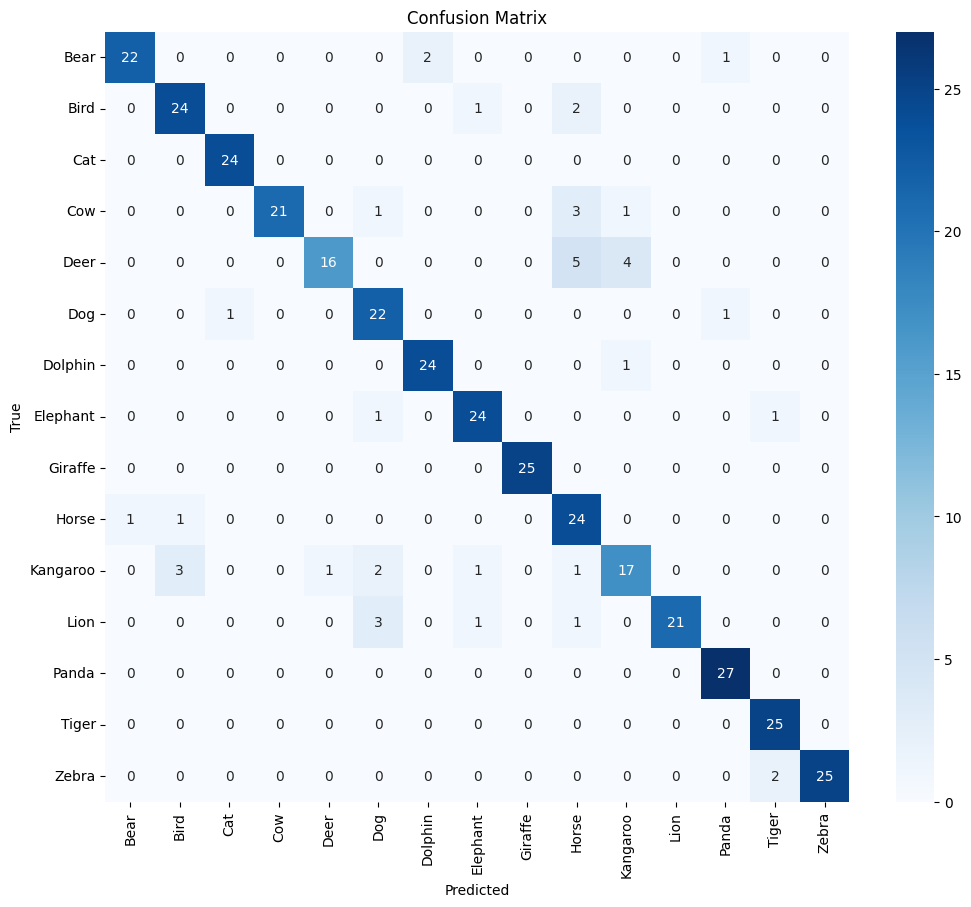

In [11]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [12]:
# Classification report
# Print accuracy, precision, recall, f1-score, and support for each class
report = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)
print("Overall Accuracy: {:.2f}%".format(report['accuracy'] * 100))
print("\nDetailed Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

Overall Accuracy: 89.03%

Detailed Classification Report:
              precision    recall  f1-score   support

        Bear       0.96      0.88      0.92        25
        Bird       0.86      0.89      0.87        27
         Cat       0.96      1.00      0.98        24
         Cow       1.00      0.81      0.89        26
        Deer       0.94      0.64      0.76        25
         Dog       0.76      0.92      0.83        24
     Dolphin       0.92      0.96      0.94        25
    Elephant       0.89      0.92      0.91        26
     Giraffe       1.00      1.00      1.00        25
       Horse       0.67      0.92      0.77        26
    Kangaroo       0.74      0.68      0.71        25
        Lion       1.00      0.81      0.89        26
       Panda       0.93      1.00      0.96        27
       Tiger       0.89      1.00      0.94        25
       Zebra       1.00      0.93      0.96        27

    accuracy                           0.89       383
   macro avg       0.9

In [13]:
# Unfreeze the top layers of MobileNetV2 for fine-tuning
base_model.trainable = True

# Freeze all layers except the last 30
fine_tune_at = len(base_model.layers) - 30
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False


In [14]:
# Recompile with a lower learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [15]:
# Fine-tune the model
fine_tune_epochs = 10

history_fine = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=fine_tune_epochs,
    callbacks=callbacks  # Use existing early stopping and checkpoint
)


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.9251 - loss: 0.2264 - val_accuracy: 0.9034 - val_loss: 0.2843
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 900ms/step - accuracy: 0.9500 - loss: 0.1646

49/49 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9502 - loss: 0.1640 - val_accuracy: 0.9191 - val_loss: 0.2786
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9691 - loss: 0.1112 - val_accuracy: 0.9112 - val_loss: 0.2982
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9870 - loss: 0.0843 - val_accuracy: 0.9034 - val_loss: 0.2738
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9847 - loss: 0.0727 - val_accuracy: 0.9086 - val_loss: 0.3047
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9808 - loss: 0.0818 - val_accuracy: 0.8851 - val_loss: 0.3237
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 895ms/step - accuracy: 0.9880 - loss: 0.0728

49/49 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9880 - loss: 0.0729 - val_accuracy: 0.9321 - val_loss: 0.2472
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9867 - loss: 0.0607 - val_accuracy: 0.9060 - val_loss: 0.2925
Epoch 9/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9885 - loss: 0.0555 - val_accuracy: 0.9138 - val_loss: 0.2794
Epoch 10/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9865 - loss: 0.0691 - val_accuracy: 0.8982 - val_loss: 0.2994


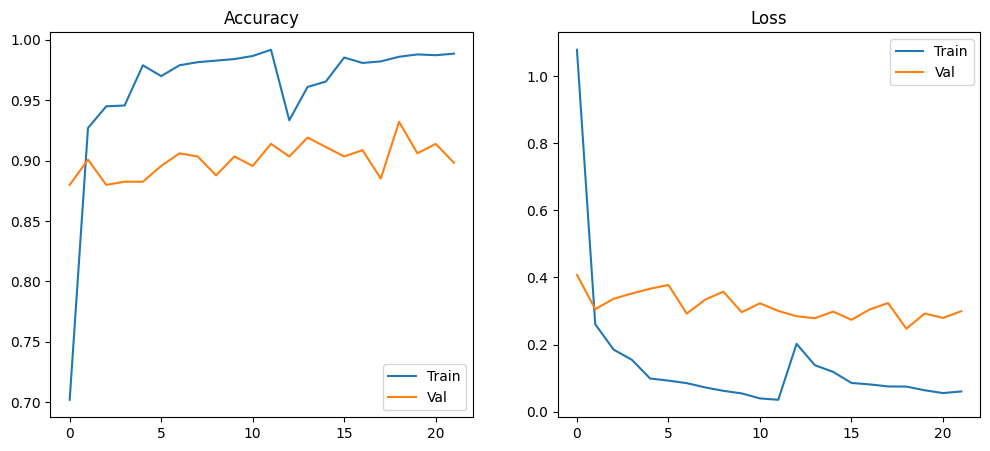

In [16]:
# Combine and plot total training history
acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']
loss = history.history['loss'] + history_fine.history['loss']
val_loss = history.history['val_loss'] + history_fine.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train')
plt.plot(epochs_range, val_acc, label='Val')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train')
plt.plot(epochs_range, val_loss, label='Val')
plt.title('Loss')
plt.legend()
plt.show()
